In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Record counts and database names
record_counts = [1000, 10000, 100000, 500000]
databases = ["redis", "memcached", "postgresql"]
workload = "f"
input_dir = "./run2"  # Directory containing result files
output_dir = "./plots"

# Initialize dictionaries to store results
read_latency_data = {db: [] for db in databases}
update_latency_data = {db: [] for db in databases}
read_modify_write_latency_data = {db: [] for db in databases}

In [3]:
# Parse files and collect data
for db in databases:
    read_latency_data[db] = []
    update_latency_data[db] = []
    read_modify_write_latency_data[db] = []
    for record_count in record_counts:
        file_name = f"run_{db}_{record_count}_workload{workload}.txt"
        file_path = os.path.join(input_dir, file_name)
        with open(file_path, "r") as file:
            content = file.read()
            # Extract metrics using regex
            read_latency_match = re.search(r"\[READ\], AverageLatency\(us\), ([0-9.]+)", content)
            update_latency_match = re.search(r"\[UPDATE\], AverageLatency\(us\), ([0-9.]+)", content)
            read_modify_write_latency_match = re.search(r"\[READ-MODIFY-WRITE\], AverageLatency\(us\), ([0-9.]+)", content)
            
            # Store extracted values with default handling for missing matches
            read_latency = float(read_latency_match.group(1)) if read_latency_match else 0.0
            update_latency = float(update_latency_match.group(1)) if update_latency_match else 0.0
            read_modify_write_latency = float(read_modify_write_latency_match.group(1)) if read_modify_write_latency_match else 0.0
            
            # Append to respective lists
            read_latency_data[db].append(read_latency)
            update_latency_data[db].append(update_latency)
            read_modify_write_latency_data[db].append(read_modify_write_latency)

In [4]:
def plot_metric(data, metric, file_name):
    for db, latencies in data.items():
        plt.plot(record_counts, latencies, label=db, marker='o', markersize=8, linewidth=1.5)

    plt_title = f"Workload {workload} - {metric}"
    plt.xlabel("Number of Records")
    plt.ylabel("Average Latency (ms)")
    plt.title(plt_title)
    plt.xscale("log")  # Log scale for record counts
    plt.legend()

    # Save or display the plot
    plt_file_name = f"workload{workload}_{file_name}.png"
    plt.savefig(os.path.join(output_dir, plt_file_name))
    plt.show()
    plt.close()

In [5]:
# handle postgre no measures for 500k records
read_latency_data["postgresql"][-1] = (float('inf'))
update_latency_data["postgresql"][-1] = (float('inf'))
read_modify_write_latency_data["postgresql"][-1] = (float('inf'))

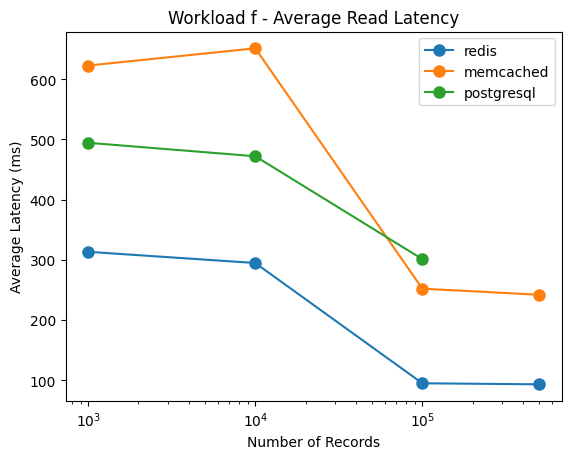

In [6]:
plot_metric(read_latency_data, "Average Read Latency", "average_read_latency")

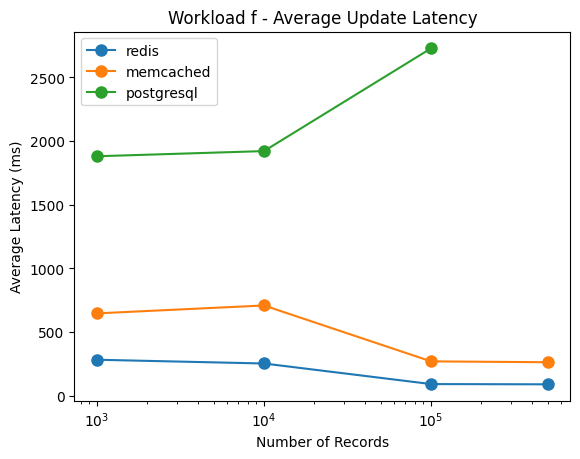

In [7]:
plot_metric(update_latency_data, "Average Update Latency", "average_update_latency")

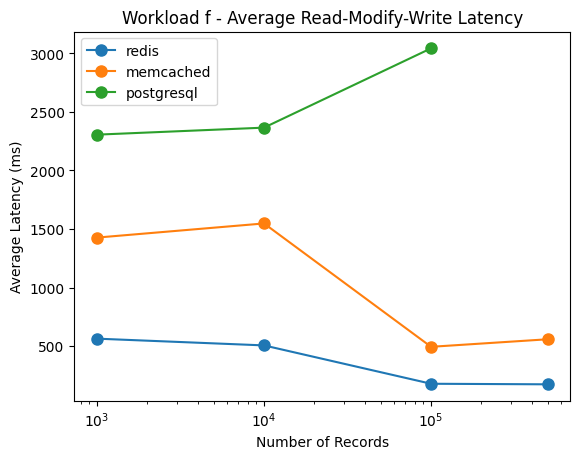

In [8]:
plot_metric(read_modify_write_latency_data, "Average Read-Modify-Write Latency", "average_read_modify_write_latency")